In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Import Bessel function of first kind (j) and order v as well 
#as Modified Bessel function of 2nd kind (k) of order n 
from scipy.special import jv, kn  #https://docs.scipy.org/doc/scipy/reference/special.html#bessel-functions
import matplotlib
matplotlib.rcParams.update({'font.size': 22})


C:\Users\okrarup\AppData\Local\Temp\ipykernel_12456\83246372.py:3: RuntimeWarning: invalid value encountered in true_divide
  return jv(m-1,P)/P/jv(m,P)-kn(m-1,Q)/Q/kn(m,Q)
C:\Users\okrarup\AppData\Local\Temp\ipykernel_12456\83246372.py:7: RuntimeWarning: invalid value encountered in true_divide
  return jv(m+1,P)/P/jv(m,P)+kn(m+1,Q)/Q/kn(m,Q)
C:\Users\okrarup\AppData\Local\Temp\ipykernel_12456\83246372.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return jv(m-1,P)/P/jv(m,P)-kn(m-1,Q)/Q/kn(m,Q)
C:\Users\okrarup\AppData\Local\Temp\ipykernel_12456\83246372.py:3: RuntimeWarning: invalid value encountered in true_divide
  return jv(m-1,P)/P/jv(m,P)-kn(m-1,Q)/Q/kn(m,Q)
C:\Users\okrarup\AppData\Local\Temp\ipykernel_12456\83246372.py:7: RuntimeWarning: invalid value encountered in true_divide
  return jv(m+1,P)/P/jv(m,P)+kn(m+1,Q)/Q/kn(m,Q)
C:\Users\okrarup\AppData\Local\Temp\ipykernel_12456\83246372.py:3: RuntimeWarning: invalid value encountered in true_divide
  return j

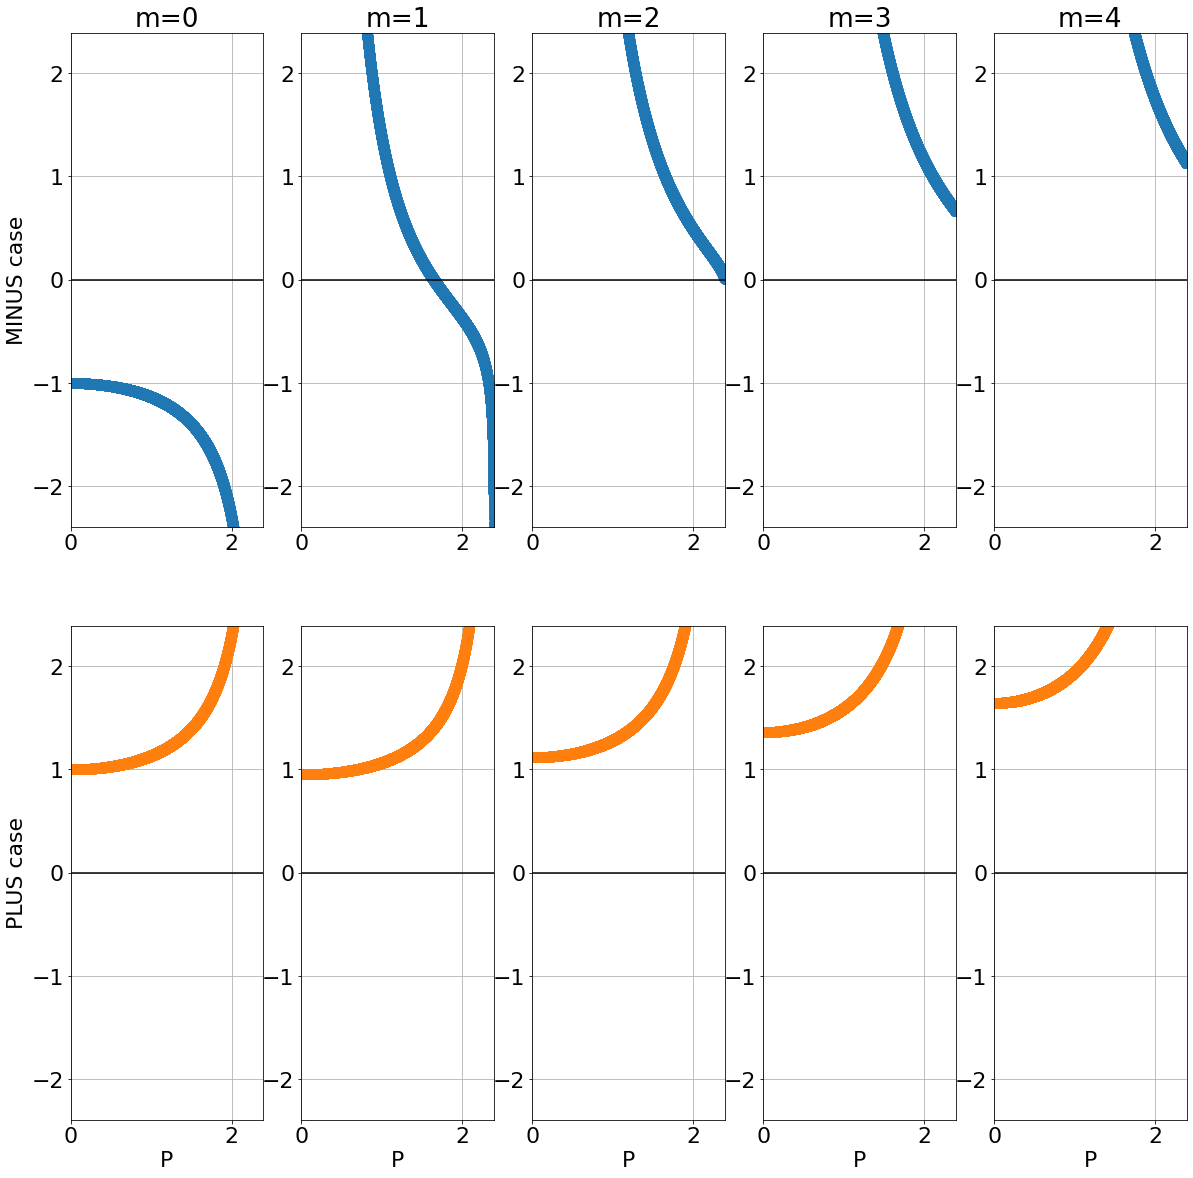

In [48]:
def MINUS(P,m,V):
    Q=np.sqrt(V**2-P**2)
    return jv(m-1,P)/P/jv(m,P)-kn(m-1,Q)/Q/kn(m,Q)

def PLUS(P,m,V):
    Q=np.sqrt(V**2-P**2)
    return jv(m+1,P)/P/jv(m,P)+kn(m+1,Q)/Q/kn(m,Q)



m_max=4
V=2.39
P=np.linspace(0,V,10000)

fig, ax=plt.subplots(2,m_max+1,figsize=(20,20))
for m in range(m_max+1):
    ax[0,m].set_title(f"m={m}")
    
    ax[0,m].plot(P,MINUS(P,m,V),'.',color='C0',markersize=20)
    
    if m==0:
        
        ax[0,m].set_ylabel("MINUS case")
    ax[0,m].axhline(y=0,color='k')
    
    
        
    
    ax[0,m].set_xlim([0,V])
    ax[0,m].set_ylim([-V,V])
    

    
    ax[0,m].grid()
    
    
    
    ax[1,m].plot(P,PLUS(P,m,V),'.',color='C1',markersize=20)
    
    if m==0:
        ax[1,m].set_ylabel("PLUS case")
    ax[1,m].set_xlim([0,V])
    ax[1,m].set_ylim([-V,V])
    ax[1,m].axhline(y=0,color='k')

    ax[1,m].grid()
    ax[1,m].set_xlabel('P')
    
    
#fig.tight_layout()    
plt.show()


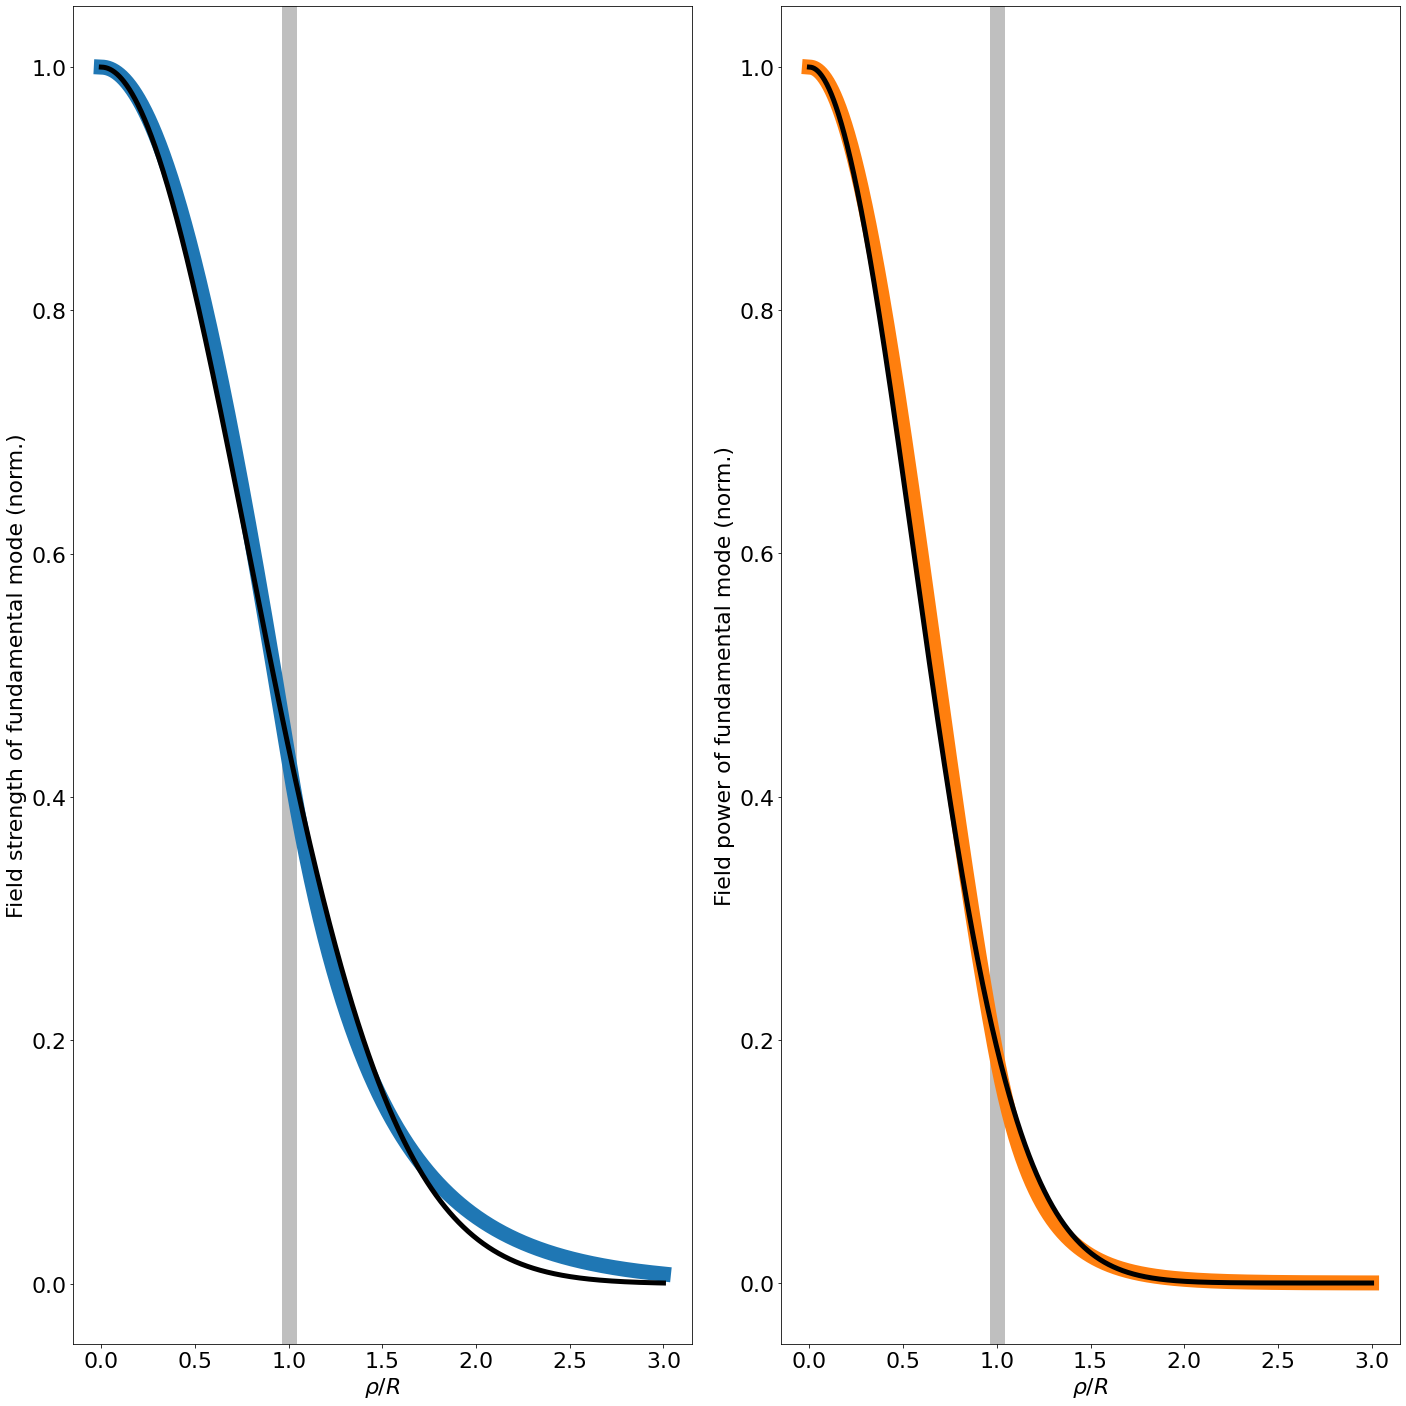

In [57]:

def V_to_GaussianWidth(V):
    return 0.65+1.619*V**(-1.5)+2.879*V**(-6)

def fieldInside(rho_over_R,V,P11):
    return jv(0,rho_over_R*P11)/P11

def fieldOutside(rho_over_R,V,P11):
    Q11=np.sqrt(V**2-P11**2)
    return jv(1,P11)/kn(1,Q11)*kn(0,rho_over_R*Q11)/Q11
    
def field(rho_over_R,V,P11):
    output = np.zeros_like(rho_over_R)
    
    for i, entry in enumerate(rho_over_R):

        if entry<=1:
            output[i]=fieldInside(entry,V,P11)
        else:
            output[i]=fieldOutside(entry,V,P11)
    return output

rho_over_R_list=np.linspace(0,3,1000)
V=2.39
P11=1.6428

totalField = field(rho_over_R_list,V,P11)


fig, ax = plt.subplots(1,2,figsize=(20,20))
ax[0].axvline(x=1,color='grey',linewidth = 15,alpha=0.5)
ax[0].plot(rho_over_R_list,totalField/np.max(totalField),linewidth = 15,color='C0')
ax[0].set_xlabel('$\\rho/R$')
ax[0].set_ylabel('Field strength of fundamental mode (norm.)')
ax[0].plot(rho_over_R_list,np.exp(-rho_over_R_list**2/(V_to_GaussianWidth(V)**2)),linewidth = 5,color='k')


ax[1].axvline(x=1,color='grey',linewidth = 15,alpha=0.5)
ax[1].plot(rho_over_R_list,(totalField/np.max(totalField))**2,linewidth = 15,color='C1')
ax[1].set_xlabel('$\\rho/R$')
ax[1].set_ylabel('Field power of fundamental mode (norm.)')
ax[1].plot(rho_over_R_list,np.exp(-2*rho_over_R_list**2/(V_to_GaussianWidth(V)**2)),linewidth = 5,color='k')


fig.tight_layout()
plt.show()



    
